In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Arial']

In [3]:
sns.set_style("ticks")

In [4]:
adata = sc.read('../../Data/adata_Neoblast.h5ad')

In [5]:
labels = ['cut0d', 'cut6h', 'cut12h', 'cut24h', 'cut2d', 'cut3d', 'cut5d', 'cut7d']
colors = ['#974FA2', '#E3191C', '#FA9A99', '#C1806C', '#67C1A4', '#FF7E00', '#757575', '#000000']

In [6]:
df = pd.DataFrame(columns=np.unique(adata.obs['TimePoint']), index=np.unique(adata.obs['clusters']))
dkn = pd.value_counts(adata.obs['clusters'])
for temp_tp in np.unique(adata.obs['TimePoint']):
    for temp_label in np.unique(adata.obs['clusters']):
        temp_num = adata.obs.loc[(adata.obs['TimePoint'] == temp_tp) & (adata.obs['clusters'] == temp_label),:].shape[0]
        df.loc[temp_label, temp_tp] = temp_num/dkn[temp_label]

In [7]:
df = df.loc[['C'+str(x) for x in range(27)],]

In [8]:
plt.rcParams['font.size'] = 5
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams["font.family"]='Arial'

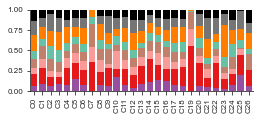

In [9]:
fig, ax = plt.subplots(1, figsize=(4, 1.5))
left = len(df) * [0]
for idx, name in enumerate(labels):
    plt.bar(df.index, df[name], bottom = left, color=colors[idx],lw=0)#,height=1)#, edgecolor='black')
    left = left + df[name]
plt.xlim(-0.5,26.5)
plt.ylim([0,1])
plt.yticks([0,0.25,0.5,0.75,1],fontsize=8, family='Arial')
plt.xticks(fontsize=8, rotation=90, family='Arial')
sns.despine()
plt.savefig('Neoblast_Proportion_barplot.png', bbox_inches='tight')